**https://tinyurl.com/ainlplab**

#**Introduction to NLP with transformers**

In this half of the session we will now practice some practical applications of tranformer models for Natural Language Processing (NLP) tasks. This notebook provides examples of NLP with a focus on using large datasets from social media as a novel tool for investigating environmental challenges. However, the methodologies presented here can be replicated using your own datasets. This workshop will be broken into three sections:

1. Simple NLP applications using pretrained models
2. Sentiment analysis of large text databases using pretrained models
3. Topic modeling of large text databases using pretrained models

I will be demonstrating simple implementations of pretrained transformer models for various Natural Language Processing (NLP) tasks. Transformers have revolutionized the field of NLP, and pretrained models like BERT, GPT-2, and RoBERTa have shown remarkable performance across a wide range of tasks. In this hands-on session, I will walk you through the process of using these powerful models for tasks such as text classification, named entity recognition, sentiment analysis, and more.

Throughout this workshop, you will gain practical experience in:

* Loading and Preprocessing Data: I will guide you through the steps of loading and preprocessing text data, ensuring it is in the suitable format for the transformer models.
* Implementing Pretrained Transformer Models: You will learn how to leverage popular pretrained transformer models, such as BERT and GPT-2, using libraries like Hugging Face's Transformers. We will explore how to access these models, tokenize input text, and obtain embeddings.
* Practical Tips and Best Practices: Throughout the session, I will share practical tips and best practices to enhance your understanding and proficiency in working with pretrained transformer models.

Whether you are new to NLP or have some experience, this workshop is designed to provide you with hands-on experience and insights into the capabilities of pretrained transformer models. By the end of this session, you will have the confidence to apply these models to your own NLP projects and leverage their power for various real-world applications.

At the start of each section, we will load the required packages (even if loaded before), this way if you want to repeate any section on its own you can start at that point without having to look back to find the correct packages to install and import.

#**Section 1. Simple NLP applications using pre-trained models**

In this section we will look at a range of differnt NLP methodologies and apply some pretrained models to analyzing small text documents.  In this section, I will introduce you to the exciting world of Natural Language Processing (NLP) and show you how to leverage pre-trained models to perform various NLP tasks effortlessly.

NLP is a rapidly evolving field that focuses on teaching machines to understand, interpret, and generate human language. With the advent of pre-trained transformer models like BERT, GPT-3, and others, NLP has witnessed groundbreaking advancements, making it easier than ever to achieve impressive results with minimal effort.

Throughout this section, I will guide you step-by-step through simple yet powerful NLP applications. You will learn how to carry out differnt methods including:

* Utilize Pre-trained Models: I will introduce you to the concept of pre-trained models and demonstrate how to access and use them through popular NLP libraries.
* Text Classification: You will discover how to implement text classification tasks, such as sentiment analysis or topic classification, using pre-trained models.
* Named Entity Recognition (NER): I will show you how to extract entities like names, organizations, and locations from text using pre-trained models.
* Text Generation: Get ready to witness the magic of language models as we delve into text generation tasks, where you can make the model generate creative and contextually relevant text.
* Question Answering: You will learn how to build a question-answering system using pre-trained models, allowing you to find answers to specific questions within a given corpus.

By the end of this section, you will have a solid foundation in implementing practical NLP applications using pre-trained models. Whether you are a beginner or already have some experience in NLP, this section will equip you with essential skills to tackle various NLP tasks with confidence.

First we will need to install the correct Python libraries to carry out this section of the NLP workshop.

In [ ]:
%%capture
!pip install transformers

Restart the Notebook
After installing, some packages that were already loaded were updated and in order to correctly use them, we should now restart the notebook.

From the Menu:

Runtime → Restart Runtime

In [ ]:
from transformers import pipeline

##*Task 1. Unmasking words*

In the context of Natural Language Processing (NLP), "unmasking words" typically refers to a specific task related to language model interpretation and understanding. Specifically, it involves predicting or revealing the masked (hidden) words in a sentence.

Unmasking has been widely used in the development and understanding of advanced language models, and it has contributed significantly to the improvement of NLP tasks across various applications.

Unmasking words can also be used for model interpretability and analysis. By analyzing the probabilities assigned to different words as candidates for the masked positions, researchers and developers can gain insights into the model's behavior and biases.

In [ ]:
#load in the umasker model
unmasker = pipeline('fill-mask', model='bert-base-uncased')

unmasker("Climate [MASK] is caused by greenhouse gases")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'bert.pooler.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.9871250987052917,
  'token': 2689,
  'token_str': 'change',
  'sequence': 'climate change is caused by greenhouse gases'},
 {'score': 0.005713209975510836,
  'token': 28436,
  'token_str': 'variability',
  'sequence': 'climate variability is caused by greenhouse gases'},
 {'score': 0.001469021080993116,
  'token': 12959,
  'token_str': 'warming',
  'sequence': 'climate warming is caused by greenhouse gases'},
 {'score': 0.0006010720389895141,
  'token': 8386,
  'token_str': 'variation',
  'sequence': 'climate variation is caused by greenhouse gases'},
 {'score': 0.00027156437863595784,
  'token': 5213,
  'token_str': 'shock',
  'sequence': 'climate shock is caused by greenhouse gases'}]

### *Try it yourself!*

In [ ]:
unmasker("YOUR TEXT AND MASK HERE")

##*Task 2. Sentiment classifier*

Sentiment classifiers are machine learning models designed to analyze and classify the sentiment or emotional tone expressed in a piece of text, such as a review, tweet, or customer feedback. The goal of sentiment classification is to determine whether the sentiment expressed is positive, negative, neutral, or sometimes more fine-grained emotions like happy, sad, angry, etc. Here, we will look at both approaches.

*In section two we will look at how we can apply sentiment classifcation to a dataset containing multiple text documents.*

In [ ]:
#load in the sentiment model
classifier = pipeline("text-classification",
                      model="j-hartmann/emotion-english-distilroberta-base",
                      return_all_scores=True)

#classify the sentiment of some text
classifier(["I love Elephants!"])

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


[[{'label': 'anger', 'score': 0.003975102677941322},
  {'label': 'disgust', 'score': 0.001414849073626101},
  {'label': 'fear', 'score': 0.0004829037934541702},
  {'label': 'joy', 'score': 0.9760998487472534},
  {'label': 'neutral', 'score': 0.004919619299471378},
  {'label': 'sadness', 'score': 0.0075303311459720135},
  {'label': 'surprise', 'score': 0.005577391944825649}]]

This second exmple is a binary classifier that says whether expressed sentiment is positve or negative.

In [ ]:
pipe = pipeline("text-classification")
pipe("This safari is awesome")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9998747110366821}]

In [ ]:
pipe("I hate the current air pollution caused by wildfires")

[{'label': 'NEGATIVE', 'score': 0.9965439438819885}]

### *Try it yourself!*

In [ ]:
#try using the same phrase twice to see how the two models provide differnt results
classifier("YOUR TEXT HERE")
pipe("YOUR TEXT HERE")

## *Task 3: Classify a sentence*

NLP and sentence classifiers refer to the field of Natural Language Processing and the specific task of classifying sentences into different categories based on their content or meaning. Unlike sentiment classifiers that focus on identifying the sentiment expressed in a sentence (positive, negative, neutral), sentence classifiers aim to categorize sentences into various classes, which may not necessarily be related to sentiment.

Sentence classifiers are widely used in various NLP applications to automatically categorize and organize text data, enabling more efficient information retrieval, decision-making, and automation in a range of domains.

In [ ]:
#load in the classification model
classifier = pipeline("zero-shot-classification")

#classify some text based on what you are looking for
classifier(
    "On vacation we stayed in an eco logde, we saw five rhinos.",
    candidate_labels=["environment", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'sequence': 'On vacation we stayed in an eco logde, we saw five rhinos.',
 'labels': ['environment', 'business', 'politics'],
 'scores': [0.9846481084823608, 0.009745074436068535, 0.005606801249086857]}

### *Try it yourself!*

In [ ]:
#classify some text based on what you are looking for
classifier(
    "YOUR TEXT HERE",
    candidate_labels=["YOUR LABEL CHOICES HERE"],

##Task 4: Named Entitiy Recognision

NER, short for Named Entity Recognition, is a crucial task in Natural Language Processing (NLP) that involves identifying and classifying named entities in a given text. Named entities are real-world objects that have specific names, such as names of people, organizations, locations, dates, time expressions, quantities, and more. The primary goal of NER is to extract and categorize these entities from unstructured text data, enabling better understanding and analysis of the content.

Key aspects of Named Entity Recognition (NER):

Entity Categories: Named entities can belong to various categories, including but not limited to:
* Person: Names of individuals.
* Organization: Names of companies, institutions, or other organizations.
* Location: Names of cities, countries, regions, and other geographic entities.
* Date: Specific dates or periods expressed in the text.
* Time: Specific times or time expressions mentioned in the text.
* Quantity: Measurements, monetary values, percentages, etc.

NER is a fundamental NLP task with numerous applications in information retrieval, document analysis, and natural language understanding. Accurate named entity recognition is a crucial step for extracting valuable insights and knowledge from unstructured text data.

In [ ]:
#load in the named entity recognision model
ner = pipeline("ner",
               grouped_entities=True)

#classify some text
ner("My name is Nathan and I work at The University of Michigan in Michigan, USA.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'entity_group': 'PER',
  'score': 0.99873966,
  'word': 'Nathan',
  'start': 11,
  'end': 17},
 {'entity_group': 'ORG',
  'score': 0.91505224,
  'word': 'Michigan',
  'start': 50,
  'end': 58},
 {'entity_group': 'LOC',
  'score': 0.9993819,
  'word': 'Michigan',
  'start': 62,
  'end': 70},
 {'entity_group': 'LOC',
  'score': 0.9990151,
  'word': 'USA',
  'start': 72,
  'end': 75}]

### *Try it yourself!*

In [ ]:
#classify some text
ner("YOUR TEXT HERE")

## *Task 5: Generate text*

Text generation is a subfield of Natural Language Processing (NLP) that focuses on creating human-like text using machine learning models. The goal of text generation is to generate coherent and contextually relevant sentences, paragraphs, or longer pieces of text that resemble human-written content.

Text generation is an exciting area in NLP, and advancements in deep learning and language models have led to impressive results in various applications. As the field continues to evolve, text generation models are expected to become even more sophisticated and capable of generating high-quality and contextually relevant text.

In [ ]:
#load in the generation model
generator = pipeline("text-generation",
                     model="distilgpt2") #note that here we are using gpt2 as it is better suited for text generation

#generate some text
generator(
    "Climate change is caused by",
    max_length=50,
    num_return_sequences=1,
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Climate change is caused by other factors in the atmosphere.\n\n\n\nSo if you are looking for information on how our climate will affect your global carbon level, look this up:\nClimate change is caused by other factors in our atmosphere. Climate change is caused by other factorsveying the atmosphere as a result of other factors, and these causes are most common in regions where precipitation and surface temperatures are higher.\nSo by definition, the only cause of the increase in cloud cover is air-'},
 {'generated_text': 'Climate change is caused by a large decrease in levels of fossil fuel concentrations. These results may contribute to an important increase in surface temperature and therefore temperature loss in the tropics. The increase in human activity could be due to climate change.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nThe following graphs show the rate of surface temperature and global warming across the United States and the United Kingdo

### *Try it yourself!*

In [ ]:
#generate some text
generator(
    "YOUR TEXT HERE",
    max_length="YOUR MAX LENGTH HERE",
    num_return_sequences="YOUR NUMBER OF RETURNS HERE",
)

## *Task 6: Comparing sentences*

Comparing sentences in Natural Language Processing (NLP) involves assessing the similarity or dissimilarity between two or more sentences. This task is essential for various applications, such as duplicate detection, plagiarism detection, paraphrase identification, and more. There are different methods and techniques used in NLP to compare sentences, each with its advantages and limitations.

The choice of the most appropriate method for comparing sentences depends on the specific application and the nature of the data. Some methods are better suited for capturing semantic similarity, while others are more suitable for capturing surface-level similarity or paraphrases. It is essential to evaluate and select the method that best fits the requirements of the particular NLP task at hand. Today we will implement BERTSimilarity.

In [ ]:
%%capture
!pip install BERTSimilarity

In [ ]:
import BERTSimilarity.BERTSimilarity as bertsimilarity

In [ ]:
f1='The man is playing soccer.'
f2='The man is playing football.'
bertsimilarity=bertsimilarity.BERTSimilarity()
dist=bertsimilarity.calculate_distance(f1,f2)
print('The distance between sentence1: '+f1+' and sentence2: '+f2+' is '+str(dist))


The distance between sentence1: The man is playing soccer. and sentence2: The man is playing football. is 0.9718283414840698


In [ ]:
f1='Tiger conservation needs more funding'
f2='Renewable energy should replace fossil fuels by 2030'
f3='The Titanic sank in the Atlantic Ocean'
f4='The Pacific Ocean is deeper in the Atlantic Ocean'
d1=bertsimilarity.calculate_distance(f1,f2)
d2=bertsimilarity.calculate_distance(f1,f3)
d3=bertsimilarity.calculate_distance(f3,f4)
d4=bertsimilarity.calculate_distance(f1,f4)
print('The distance between sentence 1: '+f1+' and sentence 2: '+f2+' is '+str(d1))
print('The distance between sentence 1: '+f1+' and sentence 3: '+f3+' is '+str(d2))
print('The distance between sentence 3: '+f3+' and sentence 4: '+f4+' is '+str(d3))
print('The distance between sentence 1: '+f1+' and sentence 4: '+f4+' is '+str(d4))

The distance between sentence 1: Tiger conservation needs more funding and sentence 2: Renewable energy should replace fossil fuels by 2030 is 0.7571544051170349
The distance between sentence 1: Tiger conservation needs more funding and sentence 3: The Titanic sank in the Atlantic Ocean is 0.5119532942771912
The distance between sentence 3: The Titanic sank in the Atlantic Ocean and sentence 4: The Pacific Ocean is deeper in the Atlantic Ocean is 0.6905016899108887
The distance between sentence 1: Tiger conservation needs more funding and sentence 4: The Pacific Ocean is deeper in the Atlantic Ocean is 0.6064651012420654


## *Task 7. Text Summarization*.

Text summarization aims to create concise summaries of longer documents while retaining the essential information. This could be useful for distilling information from large documents, or summarize papers. The goal of text summarization is to provide a coherent and meaningful summary that captures the key ideas and main concepts present in the original text.

Text summarization has a wide variety of applications:
* News Summarization: Condensing lengthy news articles into shorter summaries for quick and efficient consumption.
* Document Summarization: Creating concise summaries of research papers, reports, or legal documents for better comprehension.
* Social Media Summarization: Generating summaries of long social media threads or conversations for better readability.

In [ ]:
summarizer = pipeline("summarization", model="t5-base", tokenizer="t5-base", framework="tf")

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [ ]:
rio_info  = r"""
The Rio Earth Summit, also known as the United Nations Conference on Environment and Development (UNCED), was a significant international event held in Rio de Janeiro, Brazil, from June 3 to June 14, 1992. It brought together representatives from 172 governments, along with numerous non-governmental organizations, businesses, and other stakeholders. The summit's primary purpose was to address global environmental and developmental challenges and promote sustainable development worldwide.

During the Rio Earth Summit, several key outcomes were achieved:

Agenda 21: The conference led to the adoption of Agenda 21, an extensive action plan outlining sustainable development strategies in various areas, including poverty reduction, public health, biodiversity conservation, natural resource management, and climate change mitigation.

Climate Change: The United Nations Framework Convention on Climate Change (UNFCCC) was established as a result of the summit. The UNFCCC aimed to address the issue of climate change on a global scale by encouraging international cooperation and action.

Biodiversity: The Convention on Biological Diversity (CBD) was another significant outcome of the summit. The CBD focused on the conservation and sustainable use of biodiversity, as well as equitable sharing of benefits from genetic resources.

Forest Principles: The summit also led to the adoption of the Non-Legally Binding Authoritative Statement of Principles for a Global Consensus on the Management, Conservation, and Sustainable Development of All Types of Forests, commonly known as the "Forest Principles." These principles provided guidance on sustainable forest management.

Rio Declaration: The Declaration on Environment and Development, also known as the Rio Declaration, presented 27 principles that emphasized the importance of integrating environmental protection and social equity in sustainable development efforts.

Commission on Sustainable Development (CSD): The Rio Earth Summit established the Commission on Sustainable Development to monitor and promote the implementation of Agenda 21 and other sustainable development initiatives.

Overall, the Rio Earth Summit played a pivotal role in raising global awareness about the need for sustainable development and the interconnections between environmental, social, and economic issues. Although it did not impose binding commitments, the summit laid the groundwork for subsequent international agreements and actions aimed at addressing environmental challenges and promoting sustainable development worldwide.
"""

In [ ]:
summary=summarizer(rio_info, max_length=130, min_length=60)
print(summary)

[{'summary_text': "the Rio Earth Summit was held in Rio de Janeiro, Brazil, from June 3 to June 14, 1992 . the summit's primary purpose was to address global environmental and developmental challenges . it led to the adoption of Agenda 21, an extensive action plan outlining sustainable development strategies . biodiversity conservation, natural resource management, and climate change mitigation were key outcomes ."}]


## *Task 8. Question Answering*

Question answering (QA) in Natural Language Processing (NLP) is a task that involves designing systems capable of understanding natural language questions and providing accurate and relevant answers from a given set of documents or knowledge sources. The goal of QA systems is to emulate human-like comprehension and reasoning to respond to user queries in a precise and contextually relevant manner.

Question answering has both comercial and research applications:
* Virtual Assistants: Virtual assistants like Siri, Alexa, and Google Assistant use QA systems to answer user queries on a wide range of topics.
* Customer Support: QA systems are used in chatbots and customer support platforms to provide quick and accurate answers to customer queries.
* Educational Platforms: QA systems are employed in educational platforms to answer student questions and provide explanations.
* Medical Diagnosis: QA systems can assist healthcare professionals in accessing medical knowledge and providing accurate diagnoses.
* Information Retrieval: QA systems are used to extract specific information from large databases or textual documents.

In [ ]:
questioner = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")

In [ ]:
kyoto_info = r"""
The Kyoto Protocol is an international treaty aimed at addressing the issue of global climate change by reducing greenhouse gas emissions. It was adopted on December 11, 1997, in Kyoto, Japan, during the United Nations Framework Convention on Climate Change (UNFCCC) Conference of Parties (COP 3). The treaty entered into force on February 16, 2005, after it was ratified by enough countries to account for at least 55% of the total carbon dioxide emissions from 1990 among the parties to the UNFCCC.

Main objectives of the Kyoto Protocol:

Emission Reduction Targets: The protocol established legally binding emission reduction targets for developed countries, also known as Annex I countries. These countries committed to reducing their greenhouse gas emissions collectively by an average of 5.2% below 1990 levels during the first commitment period from 2008 to 2012.

Flexible Mechanisms: To help countries meet their emission reduction targets cost-effectively, the Kyoto Protocol introduced three flexible mechanisms:
a. Emissions Trading: Allowed countries to buy and sell emission allowances among themselves.
b. Clean Development Mechanism (CDM): Enabled developed countries to invest in emission reduction projects in developing countries and receive credits for the reductions achieved.
c. Joint Implementation (JI): Permitted developed countries to collaborate on emission reduction projects in other developed countries and receive credits.

Adaptation Fund: The protocol established the Adaptation Fund to provide financial assistance to developing countries to help them cope with the impacts of climate change.

Review and Compliance: The Kyoto Protocol implemented a rigorous system to review and assess countries' progress towards meeting their emission reduction targets and ensuring compliance with the treaty's provisions.

The Kyoto Protocol was a significant milestone in international efforts to combat climate change. However, it also faced challenges, particularly due to the absence of emission reduction commitments for major developing countries, such as China and India. As a result, the protocol was not able to address the increasing emissions from these countries and was considered by some as insufficient to fully tackle the global climate crisis.

In the years following its adoption, international climate negotiations continued, leading to the development of the Paris Agreement in 2015. The Paris Agreement built upon the principles of the Kyoto Protocol but introduced a more inclusive and flexible approach, with countries setting their own voluntary emission reduction targets (Nationally Determined Contributions) to limit global warming well below 2 degrees Celsius above pre-industrial levels.
"""

In [ ]:
result = questioner(question="When was the Kyoto Protocol adopted?", context=kyoto_info)
print(result['answer'])

December 11, 1997


In [ ]:
result = questioner(question="What agreemnet was made in 2015?", context=kyoto_info)
print(result['answer'])

Paris Agreement


## *Task 9. Translation*

NLP translation refers to the application of Natural Language Processing (NLP) techniques to automatically translate text from one language to another. The goal of NLP translation is to enable computers to understand the meaning of sentences in the source language and produce equivalent sentences in the target language, preserving the context and semantics as much as possible.

* Language Translation Services: NLP translation is widely used in online language translation services like Google Translate, Microsoft Translator, and others, enabling users to translate text between multiple languages in real-time.
* Multilingual Content Creation: NLP translation allows content creators to efficiently produce content in multiple languages, making their work accessible to global audiences.
* International Communication: NLP translation facilitates communication and collaboration across language barriers in various domains, including business, research, and diplomacy.
* Localization of Software and Apps: NLP translation is used to adapt software, websites, and mobile apps to different languages and cultures, making them more user-friendly for diverse audiences.

NLP translation is a complex and challenging task that requires deep understanding of language structures and context. Advances in deep learning, particularly in transformer-based models like BERT and GPT, have significantly improved the quality and fluency of machine translation systems, making them valuable tools for cross-lingual communication and information exchange, however you should still carefully choose the correct model for your ranslation task. Here, we will look at a few models:
* English to french model: https://huggingface.co/Helsinki-NLP/opus-mt-en-fr
* English to spanish model: https://huggingface.co/Helsinki-NLP/opus-mt-tc-big-en-es

In [ ]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.3 MB/s eta 0:00:00


Restart the Notebook
After installing, some packages that were already loaded were updated and in order to correctly use them, we should now restart the notebook.

From the Menu:

Runtime → Restart Runtime

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-fr")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-fr")

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
translator = pipeline("translation", model = model, tokenizer = tokenizer)

translated = translator('Climate change is a global issue that needs to be effectively communicated to people around the world.')[0].get('translation_text')
print(translated)

Le changement climatique est un problème mondial qui doit être communiqué efficacement aux populations du monde entier.


### *Try it yourself!*

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("YOUR CHOSEN MODEL HERE")
model = AutoModelForSeq2SeqLM.from_pretrained("YOUR CHOSEN MODEL HERE")

translator = pipeline("translation", model = model, tokenizer = tokenizer)

translated = translator('YOUR TEXT TO TRANSLATE HERE')[0].get('translation_text')
print(translated)

## *Task 10. Identifying toxic comments*

Identifying toxic comments is a Natural Language Processing (NLP) task that involves detecting offensive, harmful, or inappropriate language in text, typically in online platforms, forums, or social media. The goal is to automatically identify and filter out comments that contain offensive or toxic content to maintain a safer and more respectful online environment. To do this we will use the detoxify model: https://github.com/unitaryai/detoxify.

In [ ]:
%%capture
! pip install detoxify
! pip install pytorch-transformer

Restart the Notebook
After installing, some packages that were already loaded were updated and in order to correctly use them, we should now restart the notebook.

From the Menu:

Runtime → Restart Runtime

In [ ]:
from detoxify import Detoxify
import pandas as pd

# each model takes in either a string or a list of strings
results = Detoxify('unbiased').predict(['The mayor is an idiot they should spend money on things that matter not climate change',
                                        'So greatful for all the work greenpeace does to promote a sustainable future'])

print(pd.DataFrame(results))

   toxicity  severe_toxicity   obscene  identity_attack    insult    threat  \
0  0.994714         0.000285  0.003556         0.002409  0.992336  0.000336   
1  0.000418         0.000001  0.000025         0.000081  0.000106  0.000021   

   sexual_explicit  
0         0.000387  
1         0.000013  


### *Try it yourself!*

In [ ]:
results = Detoxify('unbiased').predict(['YOUR TEXT HERE'])

print(pd.DataFrame(results))

#**Section 2. Sentiment analysis of large text databases using pre-trained models**

In this session, we will focus on harnessing the power of pre-trained models to analyze sentiments in massive text databases, specifically exploring public perception towards hunting using tweets.

Sentiment analysis, also known as opinion mining, is a prominent Natural Language Processing (NLP) task that aims to understand and categorize the emotional tone expressed in text. By leveraging cutting-edge pre-trained models like BERT, GPT-3, or similar transformer-based architectures, we can efficiently analyze sentiments at scale, uncovering valuable insights from vast amounts of textual data.

In this workshop, we will guide you through the process of conducting sentiment analysis on a large dataset of tweets related to hunting. We will cover:

* Data Collection and Preprocessing: We will walk you through the steps of collecting tweets related to hunting and preparing the data for sentiment analysis.
* Utilizing Pre-trained Models: You will learn how to access and apply pre-trained models for sentiment analysis, capitalizing on their capabilities to comprehend the context and nuances of language.
* Sentiment Classification: We will demonstrate how to classify tweets into positive, negative, or neutral sentiments, providing a comprehensive understanding of public sentiment towards hunting.
* Visualization and Insights: Discover how to visualize sentiment and gain meaningful insights from the sentiment analysis results.
* Ethical Considerations: As we delve into sensitive topics like hunting, we will discuss ethical considerations and biases that may arise during sentiment analysis.

By the end of this section, you will have hands-on experience in conducting sentiment analysis on large text databases using pre-trained models. Additionally, you will have the tools to apply these techniques to other domains and explore public perceptions on various topics through social media or other datasets.

*Disclaimer: to comply with the Twitter API developer policy and to maintain high ethical standards, these are not real Tweets. These are fictional Tweets generated by ChatGPT 3.5."*


In [ ]:
# install the the needed libraries
%%capture
! pip install -U accelerate
! pip install -U transformers

Restart the Notebook
After installing, some packages that were already loaded were updated and in order to correctly use them, we should now restart the notebook.

From the Menu:

Runtime → Restart Runtime

In [ ]:
# import required packages
import torch
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer

# Create class for data preparation
class SimpleDataset:
    def __init__(self, tokenized_texts):
        self.tokenized_texts = tokenized_texts

    def __len__(self):
        return len(self.tokenized_texts["input_ids"])

    def __getitem__(self, idx):
        return {k: v[idx] for k, v in self.tokenized_texts.items()}

In [ ]:
# load tokenizer and model, create trainer
model_name = "j-hartmann/emotion-english-distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

## *Upload text data*

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Dr-Nathan-Fox/AI_Workshop/main/hunting_tweets.csv'
df_pred = pd.read_csv(url)

df_pred.head()

,tweet_id,text
0,1,A diverse habitat attracts a wide range of gam...
1,2,Animals have the right to live without fear of...
2,3,"Approaching hunting as a respectful pursuit, m..."
3,4,"As a former trapper, I now see how trapping ha..."
4,5,"As a hunter, I respect wildlife and the enviro..."


In [ ]:
# Convert text column to a list of texts
text_column = "text"  # select the column in your csv that contains the text to be classified
pred_texts = df_pred[text_column].dropna().astype('str').tolist()

In [ ]:
pred_texts

["A diverse habitat attracts a wide range of game. Let's protect and conserve natural hunting environments.",
 "Animals have the right to live without fear of hunters. I'm outraged by the senseless violence inflicted on them.",
 'Approaching hunting as a respectful pursuit, mindful of its impact on wildlife populations.',
 'As a former trapper, I now see how trapping harms wildlife. I regret not considering the suffering I caused.',
 'As a hunter, I respect wildlife and the environment. My actions are guided by conservation and ethical practices.',
 'As a mindful hunter, I aim to reduce suffering and be responsible in my actions.',
 'As a novice hunter, I feel nervous yet excited to embark on this journey.',
 "As an activist against hunting, I won't rest until we end this barbaric tradition and protect our precious wildlife.",
 "As an animal lover, I can't fathom the joy some hunters find in taking a life for sport. It's just cruel.",
 "As hunters, we play a crucial role in wildlife co

## *Classify texts with model*

In [ ]:
# Tokenize texts and create prediction data set
tokenized_texts = tokenizer(pred_texts,truncation=True,padding=True)
pred_dataset = SimpleDataset(tokenized_texts)

In [ ]:
pred_dataset

In [ ]:
# Run predictions
predictions = trainer.predict(pred_dataset)

In [ ]:
# Transform predictions to labels
preds = predictions.predictions.argmax(-1)
labels = pd.Series(preds).map(model.config.id2label)
scores = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

In [ ]:
labels



0      neutral
1        anger
2      disgust
3      sadness
4      neutral
        ...   
195    sadness
196    sadness
197      anger
198    sadness
199       fear
Length: 200, dtype: object

In [ ]:
# scores raw
temp = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True))

In [ ]:
# Join the predections back to the original
# container
anger = []
disgust = []
fear = []
joy = []
neutral = []
sadness = []
surprise = []

# extract scores (as many entries as exist in pred_texts)
for i in range(len(pred_texts)):
  anger.append(temp[i][0])
  disgust.append(temp[i][1])
  fear.append(temp[i][2])
  joy.append(temp[i][3])
  neutral.append(temp[i][4])
  sadness.append(temp[i][5])
  surprise.append(temp[i][6])

In [ ]:
# Create DataFrame with texts, predictions, labels, and scores
df = pd.DataFrame(list(zip(pred_texts,preds,labels, scores,  anger, disgust, fear, joy, neutral, sadness, surprise)), columns=['text','pred','label','score', 'anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise'])
df.head()

,text,pred,label,score,anger,disgust,fear,joy,neutral,sadness,surprise
0,A diverse habitat attracts a wide range of gam...,4,neutral,0.904341,0.022088,0.011509,0.006374,0.045822,0.904341,0.006878,0.002988
1,Animals have the right to live without fear of...,0,anger,0.978456,0.978456,0.009156,0.005596,0.000357,0.004304,0.001046,0.001085
2,"Approaching hunting as a respectful pursuit, m...",1,disgust,0.918521,0.034994,0.918521,0.017815,0.007118,0.010855,0.010280,0.000418
3,"As a former trapper, I now see how trapping ha...",5,sadness,0.848853,0.008586,0.085212,0.010664,0.002016,0.041720,0.848853,0.002949
4,"As a hunter, I respect wildlife and the enviro...",4,neutral,0.380615,0.366585,0.162198,0.041730,0.028895,0.380615,0.017526,0.002450


## *Create a plot of the frequencies of each sentiment group*

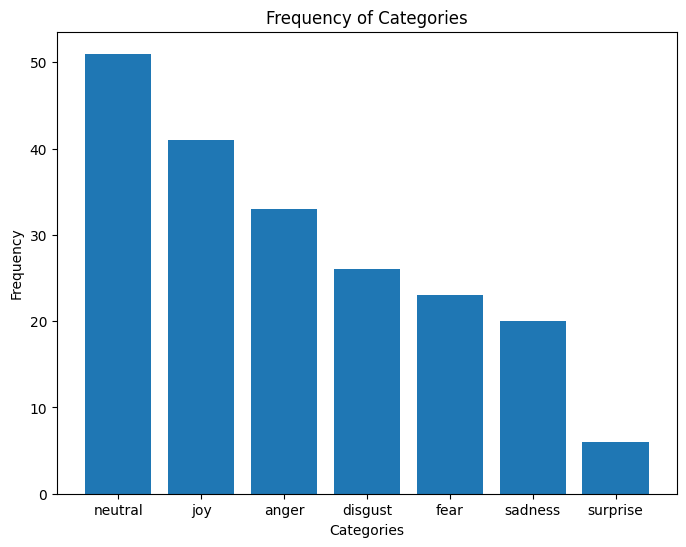

In [ ]:
import matplotlib.pyplot as plt

# Count the frequency of each category in the 'category' column
category_counts = df['label'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Frequency of Categories')
plt.show()

## *Exctract Tweets associated with a specific sentiment*

In [ ]:
#return the tweets listed as anger
anger_df = df[df.label == "anger"]

anger_df.text

1      Animals have the right to live without fear of...
7      As an activist against hunting, I won't rest u...
10     Bird hunting is destructive and pointless. The...
12     Can't comprehend how anyone finds pleasure in ...
19     Curious about the different species I might en...
22     Each poached animal represents a failure of hu...
41     Fur fashion is cruel and outdated. I'm angry a...
42     Furious at the relentless poaching that's push...
48     How dare anyone find pleasure in killing anima...
50     Hunting causes immeasurable suffering to anima...
53     Hunting disrupts ecosystems and destroys famil...
54     Hunting disrupts the delicate balance of ecosy...
66     Hunting is NOT a sport; it's an act of violenc...
71     Hunting puts endangered species at higher risk...
104    My anger towards hunting is a driving force fo...
108    My love for wildlife intensifies my anger towa...
114    Our brave wildlife rangers face danger daily t...
117    Poachers are a disgrace 

## *Export results*

In [ ]:
# save results to csv
YOUR_FILENAME = "hunting_sentiment.csv"  # name your output file
df.to_csv(YOUR_FILENAME)

In [ ]:
from google.colab import files

# download file
files.download("hunting_sentiment.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Section 3. Topic modeling of large text databases using pre-trained models**

In this section, we will learn how to apply topic modeling and explore what people talk about in reference to climate change when tweeting.

Topic modeling is a powerful technique in Natural Language Processing (NLP) that allows us to uncover hidden themes or topics present in a large collection of text data. By combining the capabilities of pre-trained models, such as BERT, GPT-3, or similar transformer-based architectures, we can efficiently analyze massive text databases and gain valuable insights into the discussions surrounding climate change on social media.

* Throughout this section section, we will guide you through the process of topic modeling on a vast dataset of tweets related to climate change. We will cover the following key aspects:
* Data Collection and Preprocessing: We will walk you through the steps of collecting tweets related to climate change and preparing the data for topic modeling.
* Utilizing Pre-trained Models: You will learn how to access and employ pre-trained models to understand the contextual representation of words and phrases, essential for topic modeling.
* Topic Extraction: We will demonstrate how to extract meaningful topics from the tweets using state-of-the-art topic modeling techniques.
* Topic Visualization and Interpretation: Discover how to visualize the identified topics and interpret the underlying themes in the context of climate change discussions.
* Insights and Applications: Uncover valuable insights into the prevailing topics and trends surrounding climate change on social media and explore potential real-world applications.
* Ethical Considerations: As we explore sensitive topics like climate change, we will discuss ethical considerations and potential biases that may arise during topic modeling.

By the end of this section, you will have practical experience in conducting topic modeling on large text databases using pre-trained models. Additionally, you will gain the skills to apply these techniques to other domains, empowering you to discover hidden patterns and themes in vast amounts of textual data.

*Disclaimer: to comply with the Twitter API developer policy and to maintain high ethical standards, these are not real Tweets. These are fictional Tweets generated by ChatGPT 3.5."*


In [ ]:
# install the the needed libraries
%%capture
!pip install -U numpy==1.11.0.
!pip install -U bertopic

Restart the Notebook
After installing, some packages that were already loaded were updated and in order to correctly use them, we should now restart the notebook.

From the Menu:

Runtime → Restart Runtime

## *Data*
For this example, we use the

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Dr-Nathan-Fox/AI_Workshop/main/climate_tweets.csv'
df_pred = pd.read_csv(url)

df_pred.head()

,tweet_id,text
0,1,Addressing poverty and inequality is crucial t...
1,2,Adopting renewable energy is an investment in ...
2,3,Adopting renewable energy reduces our reliance...
3,4,"Air pollution affects everyone, regardless of ..."
4,5,Air pollution affects not only our health but ...


## *Preprocess the text*

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

stopwords = nltk.corpus.stopwords.words('english')

# Remove stopwords
df_pred['text_without_stopwords'] = df_pred['text'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))

# Lemmatization
df_pred['text_lemmatized'] = df_pred['text_without_stopwords'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))

# Take a look at the data
df_pred.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


,tweet_id,text,text_without_stopwords,text_lemmatized
0,1,Addressing poverty and inequality is crucial t...,Addressing poverty inequality crucial reducing...,Addressing poverty inequality crucial reducing...
1,2,Adopting renewable energy is an investment in ...,"Adopting renewable energy investment cleaner, ...","Adopting renewable energy investment cleaner, ..."
2,3,Adopting renewable energy reduces our reliance...,Adopting renewable energy reduces reliance geo...,Adopting renewable energy reduces reliance geo...
3,4,"Air pollution affects everyone, regardless of ...","Air pollution affects everyone, regardless soc...","Air pollution affect everyone, regardless soci..."
4,5,Air pollution affects not only our health but ...,Air pollution affects health also health envir...,Air pollution affect health also health enviro...


Save text as a list for topic modeling

In [ ]:
docs = list(df_pred['text_lemmatized'])

In [ ]:
docs

['Addressing poverty inequality crucial reducing impact natural hazards.',
 'Adopting renewable energy investment cleaner, healthier future.',
 'Adopting renewable energy reduces reliance geopolitically sensitive regions.',
 'Air pollution affect everyone, regardless socioeconomic status.',
 'Air pollution affect health also health environment.',
 'Air pollution disproportionately affect low-income communities.',
 'Air pollution affect lungs; impact overall well-being.',
 'Air pollution exacerbates respiratory diseases, especially vulnerable populations.',
 'Air pollution global challenge demand global cooperation.',
 'Air pollution global crisis affect every living being.',
 'Air pollution public health crisis requires immediate action.',
 'Air pollution silent killer need urgent attention.',
 'Air pollution choking city jeopardizing public health.',
 "Air pollution preventable; let's take responsibility actions.",
 'Air pollution urban issue; affect rural area too.',
 'Air pollution 

##*Topic Modeling*

We start by instantiating BERTopic. We set language to `english` since our documents are in the English language. If you would like to use a multi-lingual model, please use `language="multilingual"` instead.

We will also calculate the topic probabilities. However, this can slow down BERTopic significantly at large amounts of data (>100_000 documents). It is advised to turn this off if you want to speed up the model.

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2023-08-10 19:51:45,011 - BERTopic - Transformed documents to Embeddings
2023-08-10 19:51:59,217 - BERTopic - Reduced dimensionality
2023-08-10 19:51:59,306 - BERTopic - Clustered reduced embeddings


**NOTE**: Use `language="multilingual"` to select a model that support 50+ languages.

## Attributes

There are a number of attributes that you can access after having trained your BERTopic model:


| Attribute | Description |
|------------------------|---------------------------------------------------------------------------------------------|
| topics_               | The topics that are generated for each document after training or updating the topic model. |
| probabilities_ | The probabilities that are generated for each document if HDBSCAN is used. |
| topic_sizes_           | The size of each topic                                                                      |
| topic_mapper_          | A class for tracking topics and their mappings anytime they are merged/reduced.             |
| topic_representations_ | The top *n* terms per topic and their respective c-TF-IDF values.                             |
| c_tf_idf_              | The topic-term matrix as calculated through c-TF-IDF.                                       |
| topic_labels_          | The default labels for each topic.                                                          |
| custom_labels_         | Custom labels for each topic as generated through `.set_topic_labels`.                                                               |
| topic_embeddings_      | The embeddings for each topic if `embedding_model` was used.                                                              |
| representative_docs_   | The representative documents for each topic if HDBSCAN is used.                                                |

For example, to access the predicted topics for the first 10 documents, we simply run the following:

In [ ]:
topic_model.topics_[:10]

[9, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## *Extracting Topics*
After fitting our model, we can start by looking at the results. Typically, we look at the most frequent topics first as they best represent the collection of documents.

In [ ]:
freq = topic_model.get_topic_info(); freq#.head(5)

#save topics as .csv
freq.to_csv('freq.csv', index=False)
freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,173,-1_climate_change_political_need,"[climate, change, political, need, address, ad...",[Political leader must address climate adaptat...
1,0,242,0_energy_renewable_renewables_air,"[energy, renewable, renewables, air, pollution...",[must embrace renewable energy reduce air poll...
2,1,95,1_arctic_ice_melting_antarctica,"[arctic, ice, melting, antarctica, warming, ar...",[melting Arctic Antarctic ice sheet clear sign...
3,2,86,2_biodiversity_loss_specie_life,"[biodiversity, loss, specie, life, nature, eco...",[loss biodiversity cascading effect ecosystems...
4,3,61,3_indigenous_peoples_climate_cultural,"[indigenous, peoples, climate, cultural, indig...",[Climate change disproportionately affect indi...
5,4,41,4_leader_political_prioritize_must,"[leader, political, prioritize, must, action, ...",[Political leader must prioritize sustainabili...
6,5,39,5_flood_flooding_floods_frequency,"[flood, flooding, floods, frequency, increasin...",[increasing frequency flood clear sign climate...
7,6,37,6_biodiversity_impact_combat_ecosystem,"[biodiversity, impact, combat, ecosystem, chan...",[loss biodiversity due climate change impact e...
8,7,29,7_vulnerable_health_disproportionately_heatwaves,"[vulnerable, health, disproportionately, heatw...",[consequence climate change disproportionately...
9,8,29,8_requires_global_cooperation_political,"[requires, global, cooperation, political, cha...",[fight climate change requires global politica...


-1 refers to all outliers and should typically be ignored. Next, let's take a look at a frequent topic that were generated:

In [ ]:
topic_model.get_topic(0)  # Select the most frequent topic

## *Saving topics data*

If we are interested in saving a list of which documents are associated with which topic, we can do this by creating a dataframe contianing both documents and topics. First lets print out the top ten documents associate with the most frequent topic.

In [ ]:
#create a dataframe with each document and its topic number
df = pd.DataFrame({'topic': topics, 'document': docs})

#return the top ten documents from a topic (here topic 0)
topic_0 = df[df.topic == 0][:10] #get first 10 documents in a topic

#print as a list
topic_0['document'].tolist()

['Adopting renewable energy investment cleaner, healthier future.',
 'Adopting renewable energy reduces reliance geopolitically sensitive regions.',
 'Air pollution affect everyone, regardless socioeconomic status.',
 'Air pollution affect health also health environment.',
 'Air pollution disproportionately affect low-income communities.',
 'Air pollution affect lungs; impact overall well-being.',
 'Air pollution exacerbates respiratory diseases, especially vulnerable populations.',
 'Air pollution global challenge demand global cooperation.',
 'Air pollution global crisis affect every living being.',
 'Air pollution public health crisis requires immediate action.']

Now, lets say we are super interested in topic 4 and want to extract all documents for that individual topic, we can repeate the above and then save the output dataframe as a .csv.

In [ ]:
#get all documents belonging to a specific topic (here topic 4)
topic_4 = df[df.topic == 4][:len(df[df.topic == 4])] # get all documents in a topic

#save a .csv
topic_4.to_csv('topic_4.csv', index=False)


We can also print the top documents for each topic

In [ ]:
for topic in range(10):
    topic_info = topic_model.get_topic(topic)
    representative_docs = df[df.topic == topic][:10]['document'].tolist()

    print("Topic: ", topic)
    print("Topic Information: ")
    print(topic_info)
    print("Representative Documents: ")
    print(representative_docs)
    print("\n")

Topic:  0
Topic Information: 
[('energy', 0.10766483688140867), ('renewable', 0.08506832993971217), ('renewables', 0.06597377682027285), ('air', 0.04796153655540635), ('pollution', 0.04494855101624458), ('transition', 0.03770359517807672), ('source', 0.032835285780596433), ('sustainable', 0.031348315684457485), ('technology', 0.03103396007212373), ('reduces', 0.029309851179227964)]
Representative Documents: 
['Adopting renewable energy investment cleaner, healthier future.', 'Adopting renewable energy reduces reliance geopolitically sensitive regions.', 'Air pollution affect everyone, regardless socioeconomic status.', 'Air pollution affect health also health environment.', 'Air pollution disproportionately affect low-income communities.', 'Air pollution affect lungs; impact overall well-being.', 'Air pollution exacerbates respiratory diseases, especially vulnerable populations.', 'Air pollution global challenge demand global cooperation.', 'Air pollution global crisis affect every liv

Now we can save these same results as a .txt

In [ ]:

with open('topic_info_and_representative_docs.txt', 'w') as f:
    # Loop over the topics and write the output to the file
    for topic in range(10):
        topic_info = topic_model.get_topic(topic)
        representative_docs = df[df.topic == topic][:10]['document'].tolist()

        f.write(f"Topic: {topic}\n")
        f.write("Topic Information: \n")
        f.write(f"{topic_info}\n")
        f.write("Representative Documents: \n")
        for doc in representative_docs:
            f.write(f"{doc}\n")
        f.write("\n")

## *Searching for topics related to your work*

In [ ]:
similar_topics, similarity = topic_model.find_topics("biodiveristy", top_n=5); similar_topics

[2, 16, 6, 11, 9]

In [ ]:
topic_model.get_topic(11) #update the topic to one that matches

[('earths', 0.14580647558266896),
 ('earth', 0.12429009363066298),
 ('im', 0.08919056823424051),
 ('natural', 0.08524019512188893),
 ('climate', 0.07875929878622193),
 ('survived', 0.07511303345436439),
 ('warmer', 0.07511303345436439),
 ('panic', 0.07511303345436439),
 ('skeptical', 0.06931783847394714),
 ('cycle', 0.06931783847394714)]

## *Visualization*
There are several visualization options available in BERTopic, namely the visualization of topics, probabilities and topics over time. Topic modeling is, to a certain extent, quite subjective. Visualizations help understand the topics that were created.

In [ ]:
topic_model.visualize_barchart(top_n_topics=10)

In [ ]:
# save the figure
fig = topic_model.visualize_barchart(top_n_topics=10)
fig.write_html("climate_topics.html")

## Visualize Topic Hierarchy

The topics that were created can be hierarchically reduced. In order to understand the potential hierarchical structure of the topics, we can use scipy.cluster.hierarchy to create clusters and visualize how they relate to one another. This might help selecting an appropriate nr_topics when reducing the number of topics that you have created.

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=10)

## Visualize Topic Similarity
Having generated topic embeddings, through both c-TF-IDF and embeddings, we can create a similarity matrix by simply applying cosine similarities through those topic embeddings. The result will be a matrix indicating how similar certain topics are to each other.

In [ ]:
topic_model.visualize_heatmap(n_clusters=8, width=1000, height=1000)

In [ ]:
# save the figure
fig = topic_model.visualize_heatmap(n_clusters=4, width=1000, height=1000, topics = [0,1,2,3,4])
fig.write_html("climate_heat.html")

## Visualize Topics
After having trained our `BERTopic` model, we can iteratively go through perhaps a hundred topic to get a good
understanding of the topics that were extract. However, that takes quite some time and lacks a global representation.

In [ ]:
topic_model.visualize_topics()

## Visualize Term Score Decline
Topics are represented by a number of words starting with the best representative word. Each word is represented by a c-TF-IDF score. The higher the score, the more representative a word to the topic is. Since the topic words are sorted by their c-TF-IDF score, the scores slowly decline with each word that is added. At some point adding words to the topic representation only marginally increases the total c-TF-IDF score and would not be beneficial for its representation.

To visualize this effect, we can plot the c-TF-IDF scores for each topic by the term rank of each word. In other words, the position of the words (term rank), where the words with the highest c-TF-IDF score will have a rank of 1, will be put on the x-axis. Whereas the y-axis will be populated by the c-TF-IDF scores. The result is a visualization that shows you the decline of c-TF-IDF score when adding words to the topic representation. It allows you, using the elbow method, the select the best number of words in a topic.

In [ ]:
topic_model.visualize_term_rank()

# **Section 4. Applying these methods to your own work**

In this section, I will equip you with valuable tools and techniques to apply the methods we've explored in the previous sections to your own NLP projects effectively.

Every NLP project is unique, and you may have specific requirements or datasets to work with. To assist you in your journey, I will provide practical code snippets and tips that you can directly integrate into your projects. Whether you are a beginner or an experienced NLP practitioner, this section is designed to enhance your productivity and boost your confidence in implementing NLP tasks using pre-trained models.

By the end of this section, you will be well-equipped to take the knowledge gained in this workshop and apply it confidently to your own NLP projects. Whether you are working on sentiment analysis, topic modeling, or any other NLP task, these code snippets and tips will serve as valuable resources to make your work more efficient and effective.

## *Uploading your own data from your personal folders.*

Today the data we loaded was stored in a raw format on GitHub. The data was stored there to allow for simplicity and reproducibiltiy for all users at todays workshop. However, it is unlikely that your data will be stored in this format and it may be time consuming for you to transfer it to GitHub. A simple method for gettting your data onto Google Colab is directly uploading your data - here I will show you how.

In [ ]:
# run cell and select file for upload
from google.colab import files
files.upload()

In [ ]:
# specify your filename
file_name = "/content/YOUR_FILENAME.csv"  # note: you can right-click on your file and copy-paste the path to it here
text_column = "text"  # select the column in your csv that contains the text to be classified

# read in csv
df_pred = pd.read_csv(file_name)
pred_texts = df_pred[text_column].dropna().astype('str').tolist()

## *Citations and additional resources*

*This section of the workshop has been designed and adapted previous implementations of BERT. For more information, check out:*

* *https://colab.research.google.com/github/tensorflow/text/blob/master/docs/tutorials/classify_text_with_bert.ipynb*
*   *https://maartengr.github.io/BERTopic/index.html*
*   *https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing#scrollTo=AXHLDxJdRzBi*
*   *https://huggingface.co/docs/transformers/model_doc/bert*
*   *https://colab.research.google.com/github/j-hartmann/emotion-english-distilroberta-base/blob/main/emotion_prediction_example.ipynb#scrollTo=uX3xjKZxq5iR*

